# Upload Dataset

In [1]:
from SCRIPTS.A_data_collection import make_dataset_for_regression
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_dataset_for_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


# Data analysis
Try to understand duplicates, range of values, functional dependencies

In [2]:
import pandas as pd

df = pd.DataFrame(X)
print(df.head())

          0         1         2         3         4         5         6  \
0 -1.687523  1.162717 -0.533602 -0.628703 -0.829337  0.042886  0.344324   
1 -1.020632 -0.220116 -0.869748  1.966181  0.835520 -0.296532  0.869868   
2  0.523867 -1.125007  0.085100  0.323081  0.598603  2.014563  0.827047   
3 -0.762037  0.471784 -0.558538 -0.813294  0.039496 -0.577744  0.756322   
4 -0.082485 -1.466384 -0.212735 -1.422577 -1.848497 -0.464045  1.178404   

          7         8         9  
0  0.724020 -1.314765 -0.475478  
1  0.196561  0.281992 -0.401782  
2  0.397878 -0.820872 -0.063909  
3  0.423918  0.886604 -2.272658  
4 -1.065657 -1.367547 -2.501120  


In [3]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

### Single column analysis

In [4]:
distinct_values=df[0].nunique()
print(distinct_values)

1000


In [5]:
mean_values = df.mean()
std_values = df.std()

print("Mean values:")
print(mean_values)

print("Standard deviation values:")
print(std_values)


Mean values:
0    0.005780
1   -0.031556
2   -0.016019
3    0.036449
4   -0.023135
5   -0.001820
6   -0.026303
7    0.007726
8    0.018629
9    0.092134
dtype: float64
Standard deviation values:
0    0.991113
1    0.975035
2    0.982018
3    1.023308
4    0.966829
5    1.022371
6    0.987888
7    0.972030
8    1.026852
9    1.001554
dtype: float64


# Data pollution

## Generate a complete random pollution function

In [6]:

# List of names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack','John', 'Kate', 'Larry', 'Michael', 'Nancy', 'Oliver', 'Pete', 'Robert', 'Susan', 'Tom']

# List of surnames
surnames = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']


In [7]:
import pandas as pd
import numpy as np
import random

def random_pollution(dataset, percentage):
    polluted_dataset = dataset.copy()
    num_features_affected = int(len(dataset.columns) * percentage)
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)

    for idx in random_indices:
        column_name = dataset.columns[idx]
        #if data_type == 'numeric':
        if np.issubdtype(dataset[column_name].dtype, np.number):
            # Convert numeric feature to categorical or boolean
            prob= np.random.rand()
            if prob < 0.2:
                polluted_dataset[column_name] = np.random.choice(['red', 'green', 'blue','purple','orange','yellow','grey','white','black','pink'], size=len(dataset))
            elif prob < 0.4:
                polluted_dataset[column_name] = np.random.choice([True, False], size=len(dataset))
            elif prob < 0.6:
                polluted_dataset[column_name] = np.random.choice(names, size=len(dataset))
            elif prob < 0.8:
                polluted_dataset[column_name] = np.random.choice(100, size=len(dataset))
            else:
                polluted_dataset[column_name] = np.random.choice(surnames, size=len(dataset))

    return polluted_dataset

polluted_dataset = random_pollution(df, 0.5)
print(polluted_dataset.head())

        0         1   2      3         4      5         6      7         8  \
0    blue  1.162717  35   True -0.829337  False  0.344324   blue -1.314765   
1  yellow -0.220116   5   True  0.835520   True  0.869868   grey  0.281992   
2     red -1.125007  87   True  0.598603   True  0.827047    red -0.820872   
3  purple  0.471784  79  False  0.039496  False  0.756322  black  0.886604   
4    pink -1.466384  60  False -1.848497   True  1.178404   pink -1.367547   

          9  
0 -0.475478  
1 -0.401782  
2 -0.063909  
3 -2.272658  
4 -2.501120  


## Generate a pollution function according dataset values

In [8]:
def map_value_to_color(value):
    if value >= 0 and value < 0.1:
        return 'blue'
    elif value >= 0.1 and value < 0.2:
        return 'red'
    # Add more conditions for other ranges and corresponding colors
    elif value >= 0.2 and value < 0.3:
        return 'green'
    elif value >= 0.3 and value < 0.4:
        return 'purple'
    elif value >= 0.4 and value < 0.5:
        return 'yellow'
    elif value >= 0.5 and value < 0.6:
        return 'orange'
    elif value >= 0.6 and value < 0.7:
        return 'pink'
    elif value >= 0.7 and value < 0.8:
        return 'grey'
    elif value >= 0.8 and value < 0.9:
        return 'white'
    else:
        return 'black'


In [9]:
def map_value_to_name(value):
    if value >= 0 and value < 0.2:
        return 'Alice'
    elif value >= 0.2 and value < 0.4:
        return 'Charlie'
    elif value >= 0.4 and value < 0.6:
        return 'David'
    elif value >= 0.6 and value < 0.8:
        return 'Eve'
    else:
        return 'Frank'

In [10]:
def map_to_boolean(value):
    if value >= 0 and value < 0.5:
        return True
    else:
        return False

In [11]:
def map_to_surname(value):
    if value >= 0 and value < 0.2:
        return 'Smith'
    elif value >= 0.2 and value < 0.4:
        return 'Johnson'
    elif value >= 0.4 and value < 0.6:
        return 'Williams'
    elif value >= 0.6 and value < 0.8:
        return 'Jones'
    else:
        return 'Brown'

In [12]:
num=0.145
print(int(round(num, 2)*100))

14


In [13]:
def map_to_integer(value):
    return int(round(value, 2)*100)

Scaling values before injecting pollution is crucial as it aids in the construction of the pollution function because I want to ensure that the function behaves consistently across different ranges of values. If data isn't scaled, the same amount of "pollution" could have a big impact on smaller values and a small impact on larger values. This could lead to inconsistent results and make it harder to understand the effects of the pollution.

In [14]:
from sklearn.preprocessing import MinMaxScaler
def range_based_pollution(dataset, percentage):
    num_features_affected = int(len(dataset.columns) * percentage)
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)
    random_indices = np.sort(random_indices)
    # Copy the dataset to avoid modifying the original dataset
    polluted_dataset = dataset.copy()

    # Scale only the columns in random_indices
    scaler=MinMaxScaler()
    columns_to_scale = polluted_dataset.columns[random_indices]
    polluted_dataset[columns_to_scale] = scaler.fit_transform(polluted_dataset[columns_to_scale])

    name_counter = 1
    surname_counter = 1
    names_columns = []
    surnames_columns = []

    for idx in random_indices:
        # Generate an integer random number between 0 and 3
        random_number = random.randint(0, 4)
        column = polluted_dataset.columns[idx]
        if random_number == 0:
            polluted_dataset[column] = polluted_dataset[column].apply(map_value_to_color)
        elif random_number == 1:
            new_column_name = 'names' + str(name_counter)
            polluted_dataset[column] = polluted_dataset[column].apply(map_value_to_name)
            polluted_dataset.rename(columns={column: new_column_name}, inplace=True)
            names_columns.append(new_column_name)
            name_counter += 1
        elif random_number == 2:
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_boolean)
        elif random_number == 3:
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_integer)
        else:
            new_column_name = 'surnames' + str(surname_counter)
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_surname)
            polluted_dataset.rename(columns={column: new_column_name}, inplace=True)
            surnames_columns.append(new_column_name)
            surname_counter += 1
        
    print(polluted_dataset.dtypes)

    if names_columns and surnames_columns:
        # Concatenate all 'names' columns together
        polluted_dataset['names'] = polluted_dataset[names_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Concatenate all 'surnames' columns together
        polluted_dataset['surnames'] = polluted_dataset[surnames_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Create 'full_name' column by concatenating 'names' and 'surnames' columns
        polluted_dataset['full_name'] = polluted_dataset['names'] + ' ' + polluted_dataset['surnames']
        
    return polluted_dataset

polluted_dataset = range_based_pollution(df, 0.3)
print(polluted_dataset.head())

0            float64
1            float64
2            float64
3            float64
4            float64
5              int64
6            float64
surnames1     object
8            float64
9              int64
dtype: object
          0         1         2         3         4   5         6 surnames1  \
0 -1.687523  1.162717 -0.533602 -0.628703 -0.829337  47  0.344324  Williams   
1 -1.020632 -0.220116 -0.869748  1.966181  0.835520  42  0.869868  Williams   
2  0.523867 -1.125007  0.085100  0.323081  0.598603  77  0.827047  Williams   
3 -0.762037  0.471784 -0.558538 -0.813294  0.039496  37  0.756322  Williams   
4 -0.082485 -1.466384 -0.212735 -1.422577 -1.848497  39  1.178404   Johnson   

          8   9  
0 -1.314765  49  
1  0.281992  50  
2 -0.820872  54  
3  0.886604  24  
4 -1.367547  21  


## Statistics of the polluted dataset

In [15]:
for idx in range(len(polluted_dataset.columns)):
    print(polluted_dataset.iloc[:, idx].value_counts())
    distinct_values = (polluted_dataset.iloc[:, idx].nunique())
    print(distinct_values)
    if distinct_values < 15:
        print(polluted_dataset.iloc[:, idx].value_counts())
    else:
        print("Too many distinct values to print")
    uniqueness = distinct_values / len(polluted_dataset)
    print("Uniqueness: ", uniqueness)
    print ('min:', polluted_dataset.iloc[:, idx].min())
    print ('max:', polluted_dataset.iloc[:, idx].max())
    print ('mode:', polluted_dataset.iloc[:, idx].mode()[0])

0
-1.687523    1
-0.771916    1
 0.056629    1
 2.256737    1
-0.455979    1
            ..
-1.649683    1
-0.797178    1
-0.325989    1
 0.037820    1
-1.127951    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.2082926855229754
max: 3.279456552430336
mode: -3.2082926855229754
1
 1.162717    1
-1.122683    1
-0.031318    1
 0.361788    1
-1.313228    1
            ..
-0.569984    1
 0.071970    1
 0.308531    1
 0.766043    1
 0.042814    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.702650734489273
max: 3.4570878539816565
mode: -3.702650734489273
2
-0.533602    1
-0.339426    1
-1.270515    1
 0.350229    1
-0.079330    1
            ..
 0.247250    1
 1.868609    1
-0.529002    1
-0.483982    1
 0.775350    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -2.7560789184319727
max: 3.412176776324521
mode: -2.7560789

In [16]:
#import libraries and set up
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

### Statistics of injected value

surnames1
Williams    481
Johnson     282
Jones       184
Smith        36
Brown        17
Name: count, dtype: int64


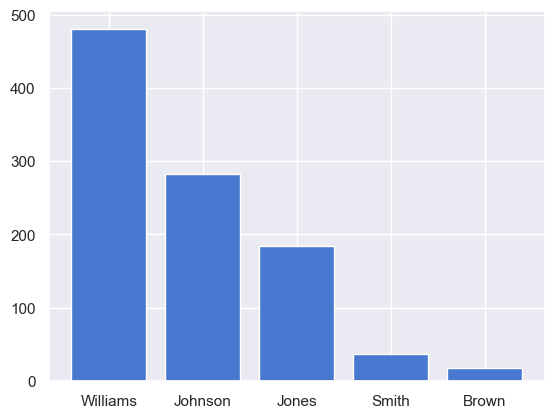

In [17]:
import matplotlib.pyplot as plt

# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        # Get the counts of each unique value in the column
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a bar plot of the counts
        plt.bar(value_counts.index, value_counts.values)

        # Show the plot
        plt.show()


These values reflect the value distribution shown below

### Statistics of numerical value

0
-1.687523    1
-0.771916    1
 0.056629    1
 2.256737    1
-0.455979    1
            ..
-1.649683    1
-0.797178    1
-0.325989    1
 0.037820    1
-1.127951    1
Name: count, Length: 1000, dtype: int64
1
 1.162717    1
-1.122683    1
-0.031318    1
 0.361788    1
-1.313228    1
            ..
-0.569984    1
 0.071970    1
 0.308531    1
 0.766043    1
 0.042814    1
Name: count, Length: 1000, dtype: int64
2
-0.533602    1
-0.339426    1
-1.270515    1
 0.350229    1
-0.079330    1
            ..
 0.247250    1
 1.868609    1
-0.529002    1
-0.483982    1
 0.775350    1
Name: count, Length: 1000, dtype: int64
3
-0.628703    1
-0.132170    1
-1.702866    1
 0.799889    1
-0.115062    1
            ..
-0.836954    1
-0.758316    1
 1.422128    1
-0.291956    1
 0.454633    1
Name: count, Length: 1000, dtype: int64
4
-0.829337    1
 0.485151    1
 1.510059    1
 0.146729    1
-0.504873    1
            ..
 0.175960    1
 1.723980    1
-0.275888    1
 0.744997    1
 0.279408    1
Name:

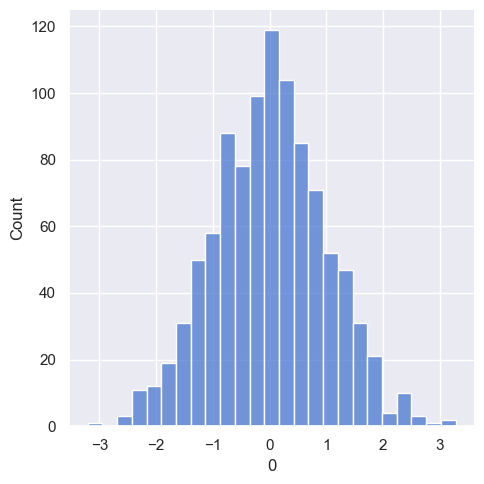

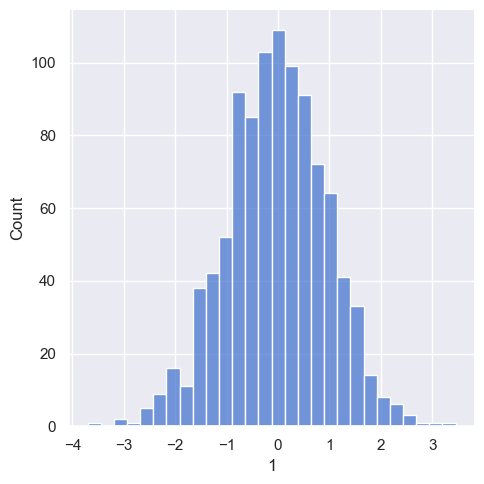

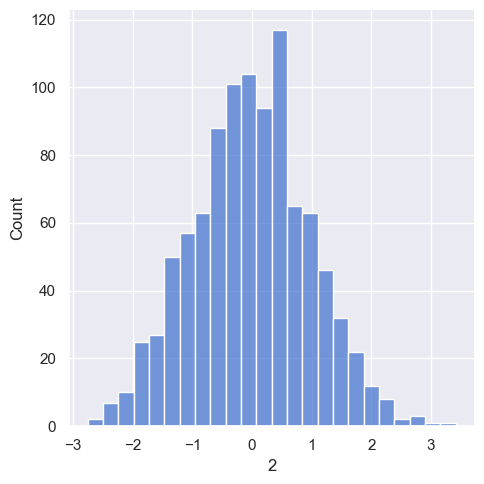

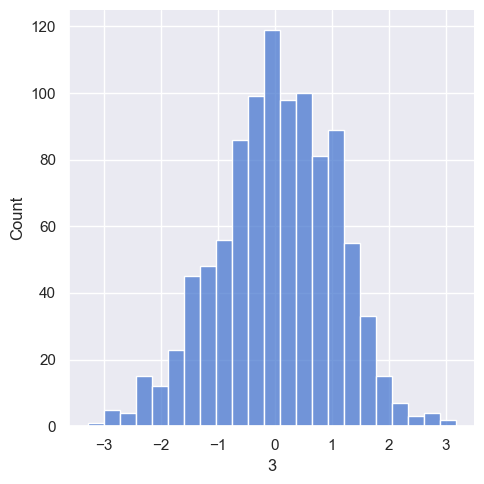

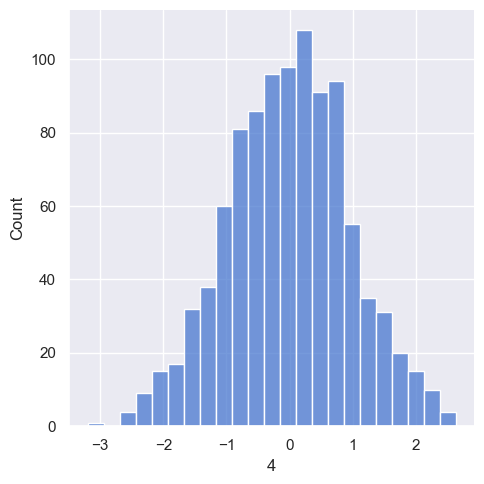

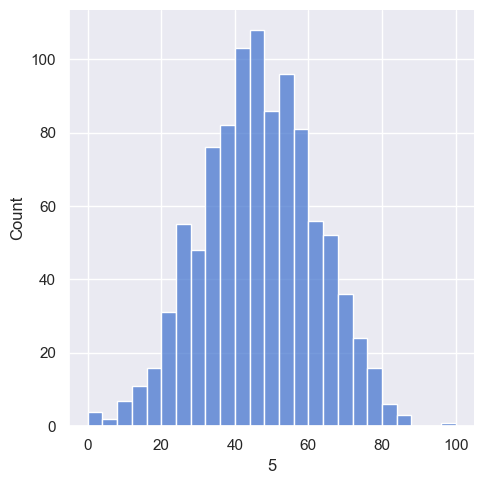

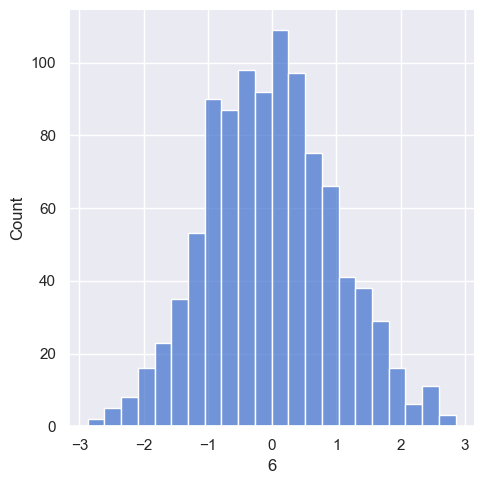

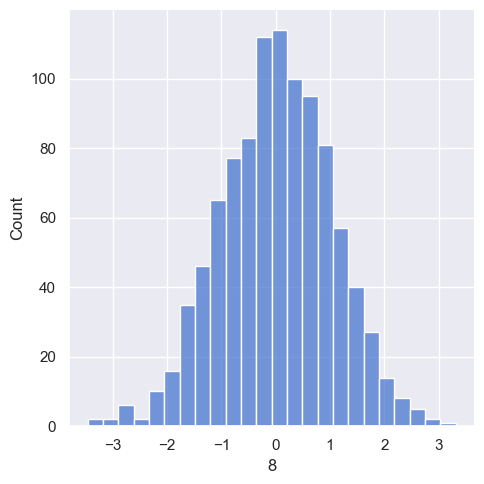

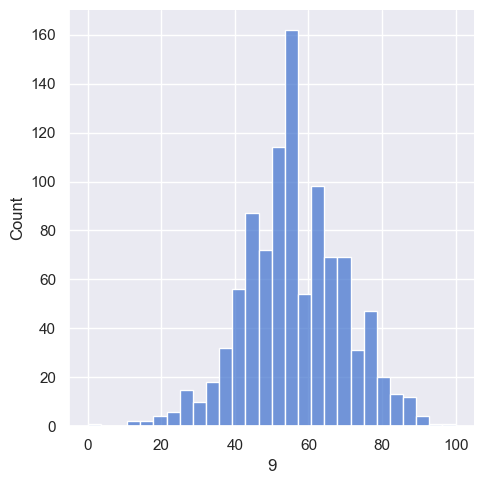

In [18]:
# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a histogram of the column values
        sns.displot(polluted_dataset[column_name])


# Regression

0            float64
1            float64
2            float64
3             object
4             object
5             object
6              int64
7               bool
8            float64
surnames1     object
10           float64
11              bool
dtype: object
Training for LinearRegressor...
surnames1     object
names1        object
2            float64
3            float64
4            float64
5            float64
surnames2     object
7             object
8               bool
9              int64
names2        object
11           float64
dtype: object
Training for LinearRegressor...
0      object
1     float64
2     float64
3     float64
4       int64
5       int64
6       int64
7      object
8        bool
9     float64
10     object
11    float64
dtype: object
Training for LinearRegressor...
0            float64
1            float64
2               bool
surnames1     object
4            float64
names1        object
6            float64
names2        object
8            float64
9

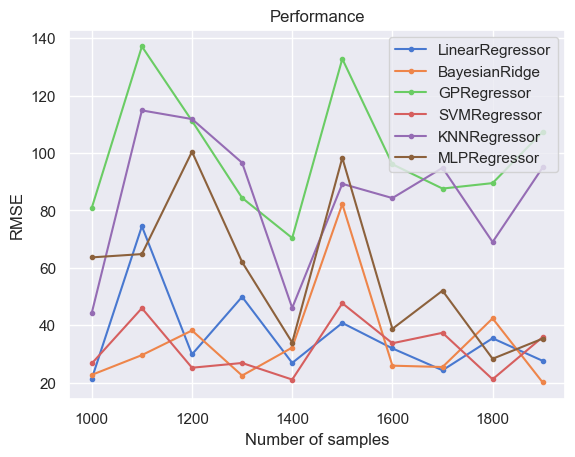

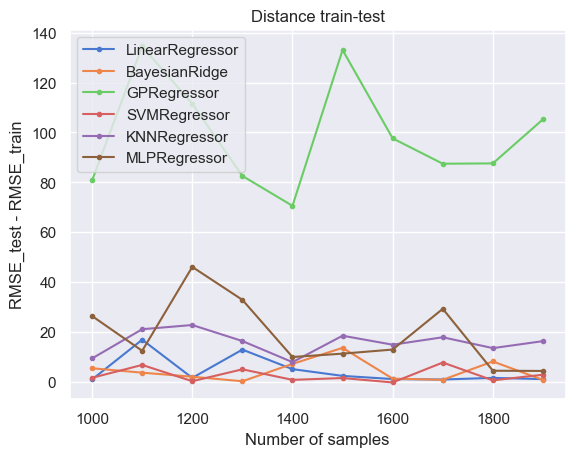

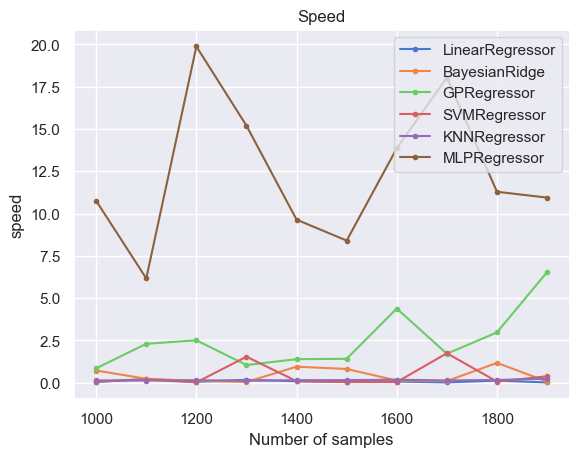

In [19]:
from SCRIPTS.D_data_analysis import regression, encoding_categorical_variables
from SCRIPTS.E_plot_results import plot

# REGRESSION EXAMPLE
    # (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
    # and I generated the three plots for the evaluation of the results)
results_for_each_algorithm = []
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","GPRegressor","SVMRegressor","KNNRegressor","MLPRegressor"]
SEED = 2023
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0,10):  # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION
        X, y = make_dataset_for_regression(n_samples=1000+i*100, n_features=12, n_informative=4, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=20.0, seed=2023)
        # DATA POLLUTION
        df = pd.DataFrame(X)
        # df = random_pollution(df, 0.3)
        df = range_based_pollution(df, 0.6)
        df.columns = df.columns.astype(str)
        df = encoding_categorical_variables(df)
        # DATA ANALYSIS
        results_1_analysis = regression(df, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
# EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
x_axis_values = [1000 + i * 100 for i in range(10)]
print(x_axis_values)

plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Distance train-test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


In [20]:
import pandas as pd

# Flatten the list of dictionaries and add algorithm name
flattened_results = []
for algorithm, results in zip(REGRESSION_ALGORITHMS, results_for_each_algorithm):
    for result in results:
        result['algorithm'] = algorithm
        flattened_results.append(result)

# Convert flattened results into a DataFrame
results_df = pd.DataFrame(flattened_results)
results_df

,mean_perf,distance,speed,algorithm
0,21.413470,0.969480,0.048009,LinearRegressor
1,74.510431,16.904770,0.225585,LinearRegressor
2,29.871048,1.606744,0.054332,LinearRegressor
3,49.919888,12.942259,0.174529,LinearRegressor
4,26.889068,5.115694,0.089606,LinearRegressor
5,40.816945,2.413688,0.053045,LinearRegressor
6,31.950998,1.143225,0.071887,LinearRegressor
7,24.331890,0.956271,0.019977,LinearRegressor
8,35.482804,1.609996,0.127703,LinearRegressor
9,27.612340,1.112850,0.017956,LinearRegressor


In [21]:
# Calculate the average of each column for each algorithm
average_results = results_df.groupby('algorithm').mean()
average_results

,mean_perf,distance,speed
algorithm,,,
BayesianRidge,34.142216,4.348499,0.435829
GPRegressor,99.756613,99.102938,2.514167
KNNRegressor,84.621472,15.884865,0.155992
LinearRegressor,36.279888,4.477498,0.088263
MLPRegressor,57.784192,19.032268,12.417402
SVMRegressor,32.178972,2.717416,0.418856
